# Curva carga-asentamiento de un pilote individual en suelo uniforme

In [17]:
import numpy as np
import matplotlib.pyplot as plt

En primer lugar definimos los datos de la estructura y del suelo

In [14]:
#Pilote
d=1 #diametro (m)
H=15 #longitud (m)

#Suelo
G0=105000 #Modulo de corte inicial(kPa)
c=35 #cohesion (kPa)
phi=32 #angulo de friccion (deg)
nu=0.3 #coeficiente de poisson (-)
fu=0.1 #friccion ultima 
Qpu=1 #carga ultima por punta
Rf=0.5 #relacion de falla

#Calculos auxiliares

A=np.pi*(d**2)/4 #area de la seccion (m2)

Definimos las fuciones que gobiernan el comportamiento por fuste

In [10]:
#Rigidez inicial del fuste
def f_Kf(d,H,G0,nu):
    R=d/2 #radio medio del pilote
    p=np.pi*d #perimetro del pilote
    rm=2*H*(1-nu) #radio donde la distorcion se hace despreciable
    Kf=(G0*H*p)/(R*np.log(rm/R))
    return Kf

#Relacion carga-deslizamiento por fuste
def f_Pf(delta,Kf,Rf,fu):
    Pf=delta/(1/Kf+Rf*delta/fu)
    return Pf

#Rigidez inicial de punta
def f_Kp(d,G0,nu):
    R=d/2 #radio medio del pilote
    Kp=2*np.pi*G0*R/(1-nu)
    return Kp

#Relacion de carga-deslizamiento por punta
def f_Pp(delta,Kp,Rf,Qpu):
    Pp=delta/(1/Kp+Rf*delta/Qpu)
    return Pp

Y graficamos la respuesta en funcion de un desplazamiento impuesto

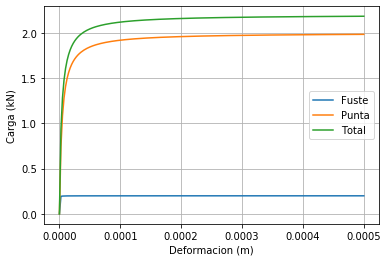

In [35]:
n=200 #puntos a plotear
delta=np.linspace(0, 0.0005, num=n) #vector de desplazamientos
Pf=np.zeros(n) #vector de carga por fuste
Pp=np.zeros(n) #vector de carga por punta
P=np.zeros(n) #vector de carga total

#Calculo las rigideces por punta y fuste 
Kf=f_Kf(d,H,G0,nu)
Kp=f_Kp(d,G0,nu)

for i in range(len(delta)):
    delta_i=delta[i]
    Pf_i=f_Pf(delta_i,Kf,Rf,fu)
    Pp_i=f_Pp(delta_i,Kp,Rf,Qpu)
    P_i=Pf_i+Pp_i
    
    Pf[i]=Pf_i
    Pp[i]=Pp_i
    P[i]=P_i

plt.plot(delta,Pf,label='Fuste')
plt.plot(delta,Pp,label='Punta')
plt.plot(delta,P,label='Total')
plt.xlabel('Deformacion (m)')
plt.ylabel('Carga (kN)')
plt.legend()
plt.grid()
plt.show()


